In [107]:
# This program solves the Poisson's Equation in 1D using the FEM method (with linear elements)
# d2u/dx2 + f(x) = 0 for x in [0,L]
# -du/dx(0) = h (Neumann Boundary Condition at x = 0)
#      u(L) = g (Dirichlet Boundary Condition at x = L)
#
# Developed by Siddhesh V. Sakhalkar
# Reference Textbook: Hughes, Thomas JR, "The finite element method: linear static and dynamic finite element analysis," 
# Courier Corporation, 2003.

In [108]:
# Import Python libraties
import numpy as np
import matplotlib.pyplot as plt

In [109]:
# Define problem parameters
L = 5  # Domain length
h = -5 # Neumann Boundary Condition
g = 2  # Dirichlet Boundary Condition

# Define forcing function
def f(x):
    return -12*x**2 + 30*x

In [110]:
# Define mesh
ne = 160    # Number of elements in mesh
nn = ne + 1 # Number of nodes in mesh (= ne+1 for linear elements in 1D)
he = L/ne   # Element width
x = np.linspace(0, L, nn) # Mesh nodes

In [111]:
# Initialize global stiffness matrix and force vector
K = np.zeros((nn, nn))
F = np.zeros(nn)

# Loop over all elements to assemble global stiffness matrix and force vector
for e in range(ne):
    
    # 2x2 element stiffness matrix (for the element with nodes x[e] and x[e+1])
    ke = 1/he * np.array([[1, -1], [-1, 1]])

    # 2x1 element force vector (for the element with nodes x[e] and x[e+1])
    f0 = f(x[e])
    f1 = f(x[e+1])
    fe = he/6 * np.array([2*f0 + f1, f0 + 2*f1]);
    if e == 0:
        fe[0] += h # Neumann Boundary Condition
    elif e == ne-1:
        fe += - ke[:,1] * g # Dirichlet Boundary Condition
    
    # Assemble into the global stiffness matrix and force vector
    K[e:e+2, e:e+2] += ke
    F[e:e+2] += fe

# Apply Dirichlet Boundary Condition: u(L) = g
K = K[0:-1, 0:-1]  # Remove last row and column of K
F = F[0:-1]        # Remove last row of F

In [112]:
# Solve the linear system K*d = F
d = np.zeros(nn)  # Initialize solution vector
d[nn-1] = g       # Apply Dirichlet Boundary Condition: u(L) = g
d[0:-1] = np.linalg.solve(K, F);

In [113]:
# Define analytical solution
plot_analytical = 1 # =0 => do not plot analytical solution, =1 => plot analytical solution
def u(x):
    return x**4 - 5*x**3 - h*x + (g - L**4 + 5*L**3 + h*L)

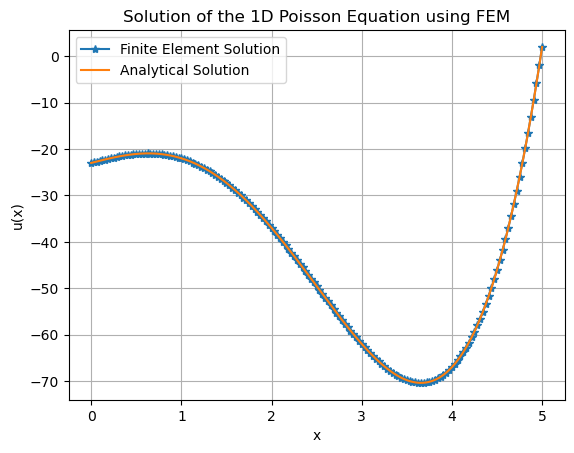

In [114]:
# Plot numerical and analytical solutions
plt.plot(x, d, '-*', label = "Finite Element Solution")
if plot_analytical == 1:
    x_plot = np.linspace(0, L, 2000)
    plt.plot(x_plot, u(x_plot), label = "Analytical Solution")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.title("Solution of the 1D Poisson Equation using FEM")
plt.legend()
plt.grid()
plt.show()